In [1]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import cv2
from skimage import transform
from skimage.color import rgb2gray #To gray the frames
import pickle
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [16]:
datagen = ImageDataGenerator(
        rotation_range=22,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest') #the strategy used for filling in newly created pixels

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory



for i in range(1,6):
    folder = str(i)
    for j in range(1,59):
        if j<10:
            image_route = "data/train/"+folder+"/archivo0000%d.png" %j
        else:
            image_route = "data/train/"+folder+"/archivo000%d.png" %j
        
        print(image_route)
        
        img = load_img(image_route)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
            
        k = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir="preview/train/"+folder, save_prefix='archivo', save_format='png'):
            k += 1
            if k > 8:
                break  # otherwise the generator would loop indefinitely
                
    

data/train/1/archivo00001.png
data/train/1/archivo00002.png
data/train/1/archivo00003.png
data/train/1/archivo00004.png
data/train/1/archivo00005.png
data/train/1/archivo00006.png
data/train/1/archivo00007.png
data/train/1/archivo00008.png
data/train/1/archivo00009.png
data/train/1/archivo00010.png
data/train/1/archivo00011.png
data/train/1/archivo00012.png
data/train/1/archivo00013.png
data/train/1/archivo00014.png
data/train/1/archivo00015.png
data/train/1/archivo00016.png
data/train/1/archivo00017.png
data/train/1/archivo00018.png
data/train/1/archivo00019.png
data/train/1/archivo00020.png
data/train/1/archivo00021.png
data/train/1/archivo00022.png
data/train/1/archivo00023.png
data/train/1/archivo00024.png
data/train/1/archivo00025.png
data/train/1/archivo00026.png
data/train/1/archivo00027.png
data/train/1/archivo00028.png
data/train/1/archivo00029.png
data/train/1/archivo00030.png
data/train/1/archivo00031.png
data/train/1/archivo00032.png
data/train/1/archivo00033.png
data/train

data/train/5/archivo00043.png
data/train/5/archivo00044.png
data/train/5/archivo00045.png
data/train/5/archivo00046.png
data/train/5/archivo00047.png
data/train/5/archivo00048.png
data/train/5/archivo00049.png
data/train/5/archivo00050.png
data/train/5/archivo00051.png
data/train/5/archivo00052.png
data/train/5/archivo00053.png
data/train/5/archivo00054.png
data/train/5/archivo00055.png
data/train/5/archivo00056.png
data/train/5/archivo00057.png
data/train/5/archivo00058.png


In [113]:
def hog_features(image_uri):
    ppc = 4

    image = cv2.imread(image_uri)
    image = cv2.resize(image, (160,160))
    image = rgb2gray(image)

    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),
                       cells_per_block=(4, 4),block_norm='L2',visualise=True)

    return fd, hog_image

'''
ppc = 4 and 200x200 -> 
Accuracy: 0.4666666666666667
              precision    recall  f1-score   support

           1       0.38      0.50      0.43         6
           2       0.20      0.17      0.18         6
           3       0.33      0.33      0.33         6
           4       0.71      0.83      0.77         6
           5       0.75      0.50      0.60         6

   micro avg       0.47      0.47      0.47        30
   
ppc = 4 and 160x160 -> 
           1       0.38      0.50      0.43         6
           2       0.29      0.33      0.31         6
           3       0.25      0.17      0.20         6
           4       0.71      0.83      0.77         6
           5       0.75      0.50      0.60         6
           micro avg = 0.47
           
ppc = 4 and 180x180 -> 
Accuracy: 0.43333333333333335
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         6
           2       0.20      0.17      0.18         6
           3       0.40      0.33      0.36         6
           4       0.57      0.67      0.62         6
           5       0.75      0.50      0.60         6

   micro avg       0.43      0.43      0.43        30
           
ppc = 4 and 130x130 -> 
Accuracy: 0.4
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         6
           2       0.17      0.17      0.17         6
           3       0.25      0.17      0.20         6
           4       0.57      0.67      0.62         6
           5       0.75      0.50      0.60         6

   micro avg       0.40      0.40      0.40        30
           
ppc = 3 and 160x160 ->
Accuracy: 0.43333333333333335
              precision    recall  f1-score   support

           1       0.25      0.50      0.33         6
           2       0.00      0.00      0.00         6
           3       0.43      0.50      0.46         6
           4       0.56      0.83      0.67         6
           5       1.00      0.33      0.50         6

   micro avg       0.43      0.43      0.43        30
'''

'\nppc = 4 and 200x200 -> \nAccuracy: 0.4666666666666667\n              precision    recall  f1-score   support\n\n           1       0.38      0.50      0.43         6\n           2       0.20      0.17      0.18         6\n           3       0.33      0.33      0.33         6\n           4       0.71      0.83      0.77         6\n           5       0.75      0.50      0.60         6\n\n   micro avg       0.47      0.47      0.47        30\n   \nppc = 4 and 160x160 -> \n           1       0.38      0.50      0.43         6\n           2       0.29      0.33      0.31         6\n           3       0.25      0.17      0.20         6\n           4       0.71      0.83      0.77         6\n           5       0.75      0.50      0.60         6\n           micro avg = 0.47\n           \nppc = 4 and 180x180 -> \nAccuracy: 0.43333333333333335\n              precision    recall  f1-score   support\n\n           1       0.33      0.50      0.40         6\n           2       0.20      0.17     

(406, 366)
(406, 366)


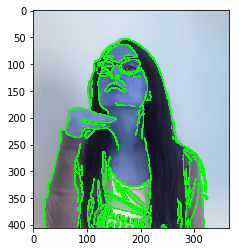

In [8]:
def edge_detection(image_uri):
    # The first argument is the image
    image = cv2.imread(image_uri)
    image_resized = transform.resize(image, [160, 160])

    #convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #blur it
    blurred_image = cv2.GaussianBlur(gray_image, (7,7), 0)
    #Edges
    canny = cv2.Canny(blurred_image, 10, 30)

    canny2 = cv2.Canny(blurred_image, 20, 60)
    
    
    return canny2#, image_resized, canny

image_uri = "data/validation/2/archivo00001.png"

image = cv2.imread(image_uri)
im, contours, hierarchy= cv2.findContours(edge_detection(image_uri), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(edge_detection(image_uri).shape)
print(im.shape)
cv2.drawContours(image, contours, -1, (0,255,0), 2)
plt.imshow(image)

In [114]:
#train_data = {}
train_features = []
train_images = []
train_labels = []

train_size = 59
classes = 5

for i in range(1,classes+1):
    folder = str(i)
    
    #train_data[i] = []
    for j in range(1,train_size+1):
        if j<10:
            image_route = "data/train/"+folder+"/archivo0000%d.png" %j
        elif j<100:
            image_route = "data/train/"+folder+"/archivo000%d.png" %j
        elif j<1000:
            image_route = "data/train/"+folder+"/archivo00%d.png" %j
        else:
            image_route = "data/train/"+folder+"/archivo0%d.png" %j
            
        #print(image_route)
        h_f, h_i = hog_features(image_route)
            
        train_features.append(h_f)
        train_images.append(h_i)
        train_labels.append(i)
        #train_data[i].append([h_f, h_i])
        

/Users/juancho/anaconda3/envs/isproject/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [115]:
validation_features = []
validation_images = []
validation_labels = []
images = []

for i in range(1,6):
    folder = str(i)
    #train_data[i] = []
    for j in range(1,7):
        if j<10:
            h_f, h_i = hog_features("data/validation/"+folder+"/archivo0000%d.png" %j)
        else:
            h_f, h_i = hog_features("data/validation/"+folder+"/archivo000%d.png" %j)
            
        images.append(cv2.imread("data/validation/"+folder+"/archivo0000%d.png" %j))
        validation_features.append(h_f)
        validation_images.append(h_i)
        validation_labels.append(i)
        #train_data[i].append([h_f, h_i])

In [116]:
#f = open("train_data.pkl","wb")
#pickle.dump(train_data,f)
#f.close()

1 [0.         0.         0.         ... 0.00041053 0.         0.15989521]


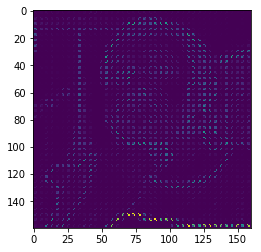

In [117]:
plt.imshow(train_images[66])
print(train_labels[3], train_features[1]) #Features[][][0] Images[][][1]

In [118]:
clf = svm.SVC()

#hog_features = np.array(hog_features)
#data_frame = np.hstack((hog_features,labels))
#np.random.shuffle(data_frame)

x_train, x_test = train_features[:], validation_features[:]
y_train, y_test = train_labels[:] , validation_labels[:]

clf.fit(x_train,y_train)

/Users/juancho/anaconda3/envs/isproject/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [112]:
y_pred = clf.predict(x_test)

print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.36666666666666664


              precision    recall  f1-score   support

           1       0.33      0.50      0.40         6
           2       0.14      0.17      0.15         6
           3       0.00      0.00      0.00         6
           4       0.57      0.67      0.62         6
           5       0.75      0.50      0.60         6

   micro avg       0.37      0.37      0.37        30
   macro avg       0.36      0.37      0.35        30
weighted avg       0.36      0.37      0.35        30



[4]


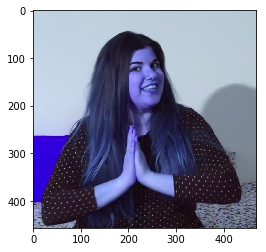

In [49]:
index = 20

print(clf.predict(validation_features[index].reshape(1, -1)))
plt.imshow(images[index])